# LETS GROW MORE VIP

### Task 2- Prediction using Decision Tree Algorithm 

Author-Sourabh Jhod

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Shape of Data

In [4]:
df.shape

(150, 5)

# Information about Data


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Checking Missing Values

In [6]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

# Checking for Duplicates

In [7]:
df[df.duplicated()]

,sepal length,sepal width,petal length,petal width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(147, 5)

# Statistical Measures of Data


In [10]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking Correlation 


<AxesSubplot:>

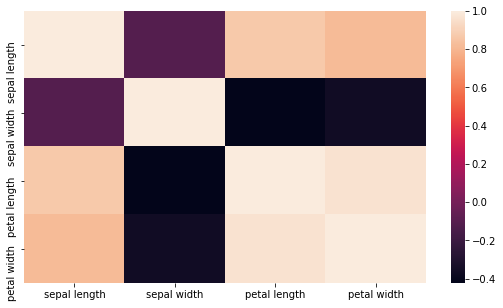

In [11]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr())

# Univariate analysis

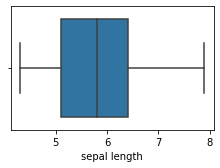

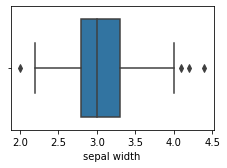

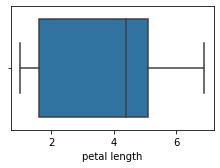

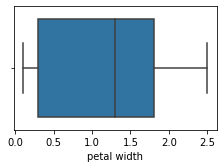

In [12]:
plt.figure(figsize=(8,5))
plt.subplot(2,2,1)
sns.boxplot(df['sepal length'])
plt.show()
plt.figure(figsize=(8,5))
plt.subplot(2,2,2)
sns.boxplot(df['sepal width'])
plt.show()
plt.figure(figsize=(8,5))
plt.subplot(2,2,3)
sns.boxplot(df['petal length'])
plt.show()
plt.figure(figsize=(8,5))
plt.subplot(2,2,3)
sns.boxplot(df['petal width'])
plt.show()

#  Bivariate Analysis

<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>

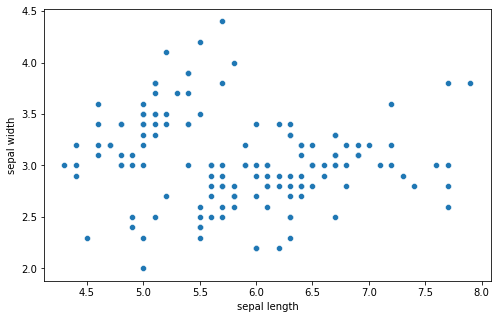

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(df['sepal length'],df['sepal width'])

<AxesSubplot:xlabel='petal length', ylabel='petal width'>

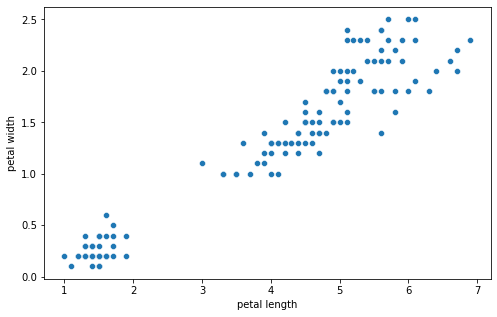

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(df['petal length'],df['petal width'])

<AxesSubplot:xlabel='class', ylabel='count'>

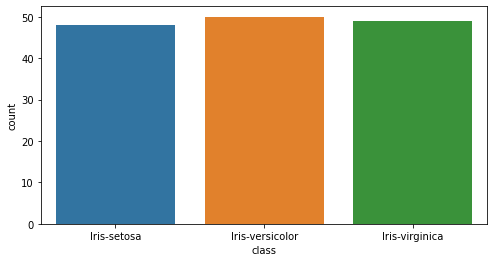

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(df['class'])

# Multivariate Analysis

<Figure size 576x360 with 0 Axes>

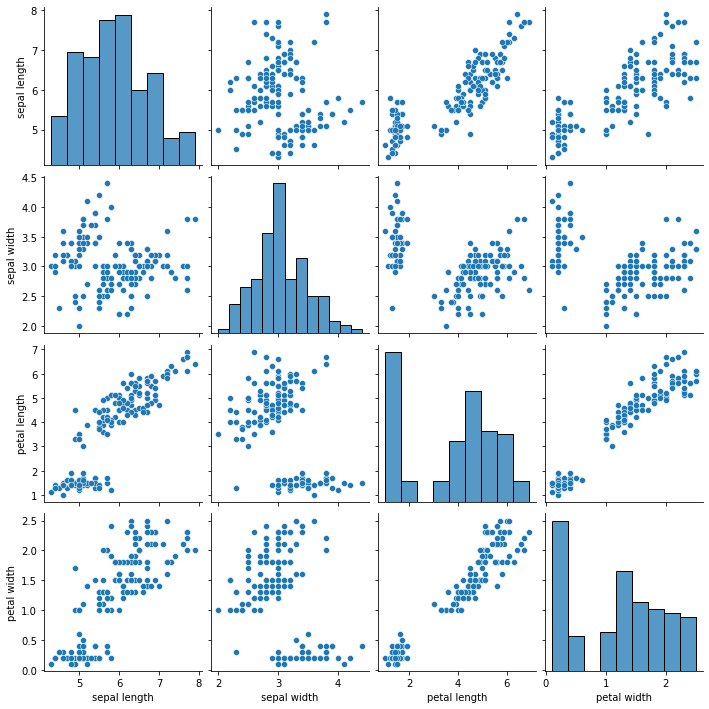

In [16]:
plt.figure(figsize=(8,5))
sns.pairplot(df)

# Saperating X And Y Values

In [17]:
X = df.iloc[:,:-1].values
y= df.iloc[:,-1].values

# Splitting X & Y

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

# Selecting hyperparameters using Gridsearch cv

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
clf = DecisionTreeClassifier()

In [22]:
param_dict={
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,None]   
}

In [23]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf,param_grid=param_dict,cv=10,n_jobs=-1)

In [24]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [25]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=2)

In [26]:
grid.best_score_

0.9400000000000001

In [27]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

# Model training

In [28]:
clf = DecisionTreeClassifier( criterion= 'gini',max_depth = 3)

In [29]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
y_pred = clf.predict(X_test) 

# Checking Accuracy of model

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9555555555555556

# confusion_matrix

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 16,  0],
       [ 0,  2, 11]], dtype=int64)

# Classification Report

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.89      1.00      0.94        16
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



# Visualization of Decission Tree

In [35]:
from sklearn.tree import plot_tree

[Text(1674.0, 2378.25, 'X[3] <= 0.8\ngini = 0.666\nsamples = 102\nvalue = [32, 34, 36]'),
 Text(1116.0, 1698.75, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(2232.0, 1698.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 70\nvalue = [0, 34, 36]'),
 Text(1116.0, 1019.25, 'X[0] <= 7.1\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(558.0, 339.75, 'gini = 0.108\nsamples = 35\nvalue = [0, 33, 2]'),
 Text(1674.0, 339.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(3348.0, 1019.25, 'X[2] <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(2790.0, 339.75, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(3906.0, 339.75, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]')]

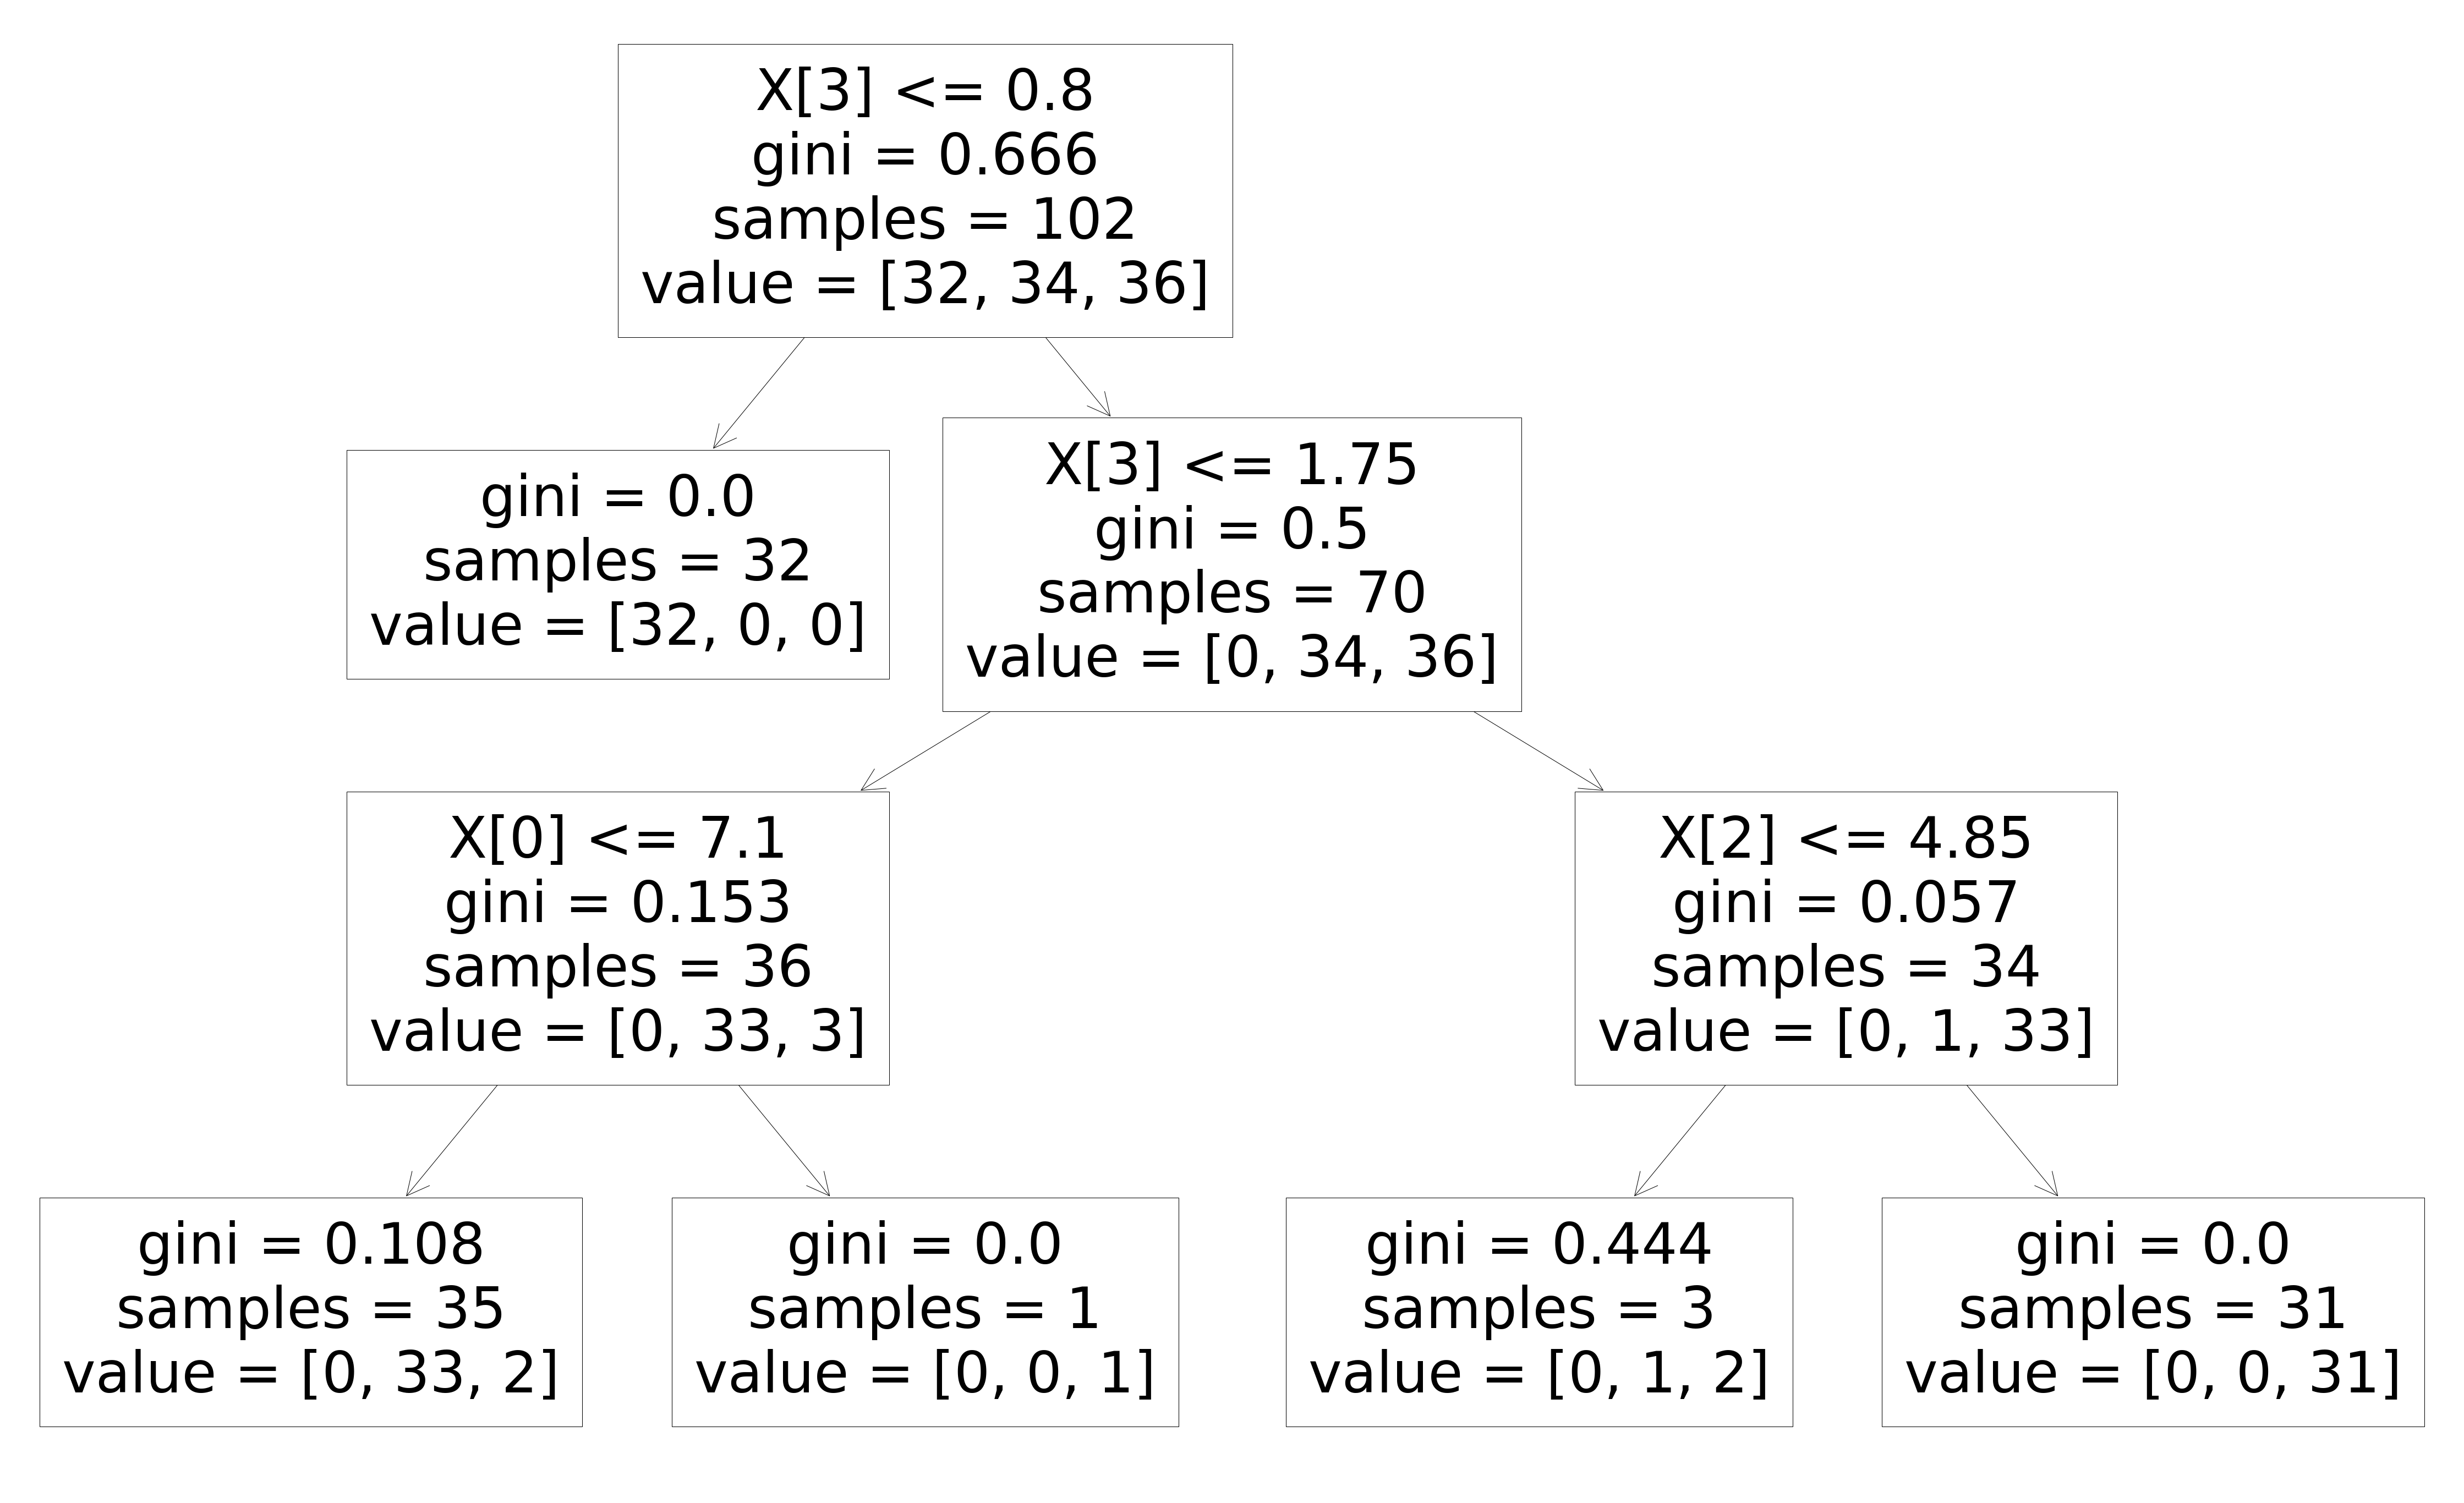

In [36]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50
plot_tree(clf)

# Prediction

In [37]:
clf.predict([[5.1, 3.5, 1.4, 0.2]])

array(['Iris-setosa'], dtype=object)